## 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
### 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 이것을 변경해야한다.

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [4]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())


Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 경우 N이 687건으로 가장 많으며, 속성값이 정리되지 않았음. 예를 들어 'C23 C25 C27' 과 같이 여러 Cabin이 한꺼번에 표기된 값이 존재한다. 이 경우 선실 등급을 나타내는 첫 번째 알파벳이 중요해보이므로, cabin 속성의 앞 문자만 추출한다.

In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


성별에 따른 생존자 수 비교

In [6]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

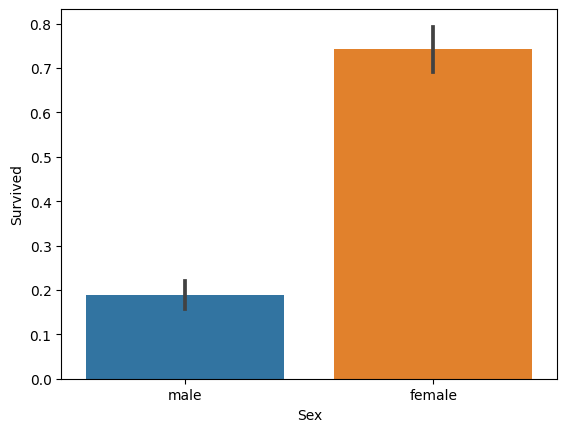

In [7]:
### 그래프로 시각화
sns.barplot(x = 'Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

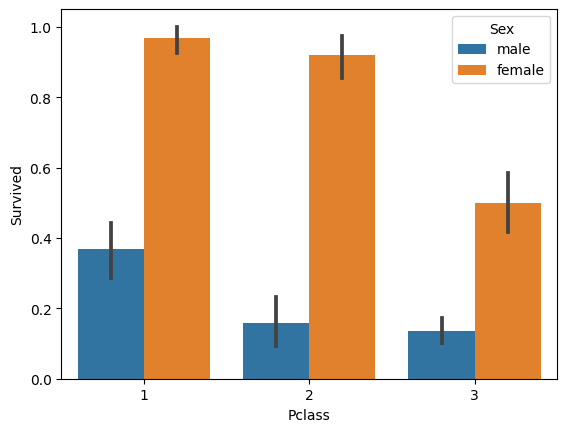

In [8]:
### 객실 등급과 성별에 따른 생존 확률 
sns.barplot(x = 'Pclass', y='Survived', hue = 'Sex', data=titanic_df)

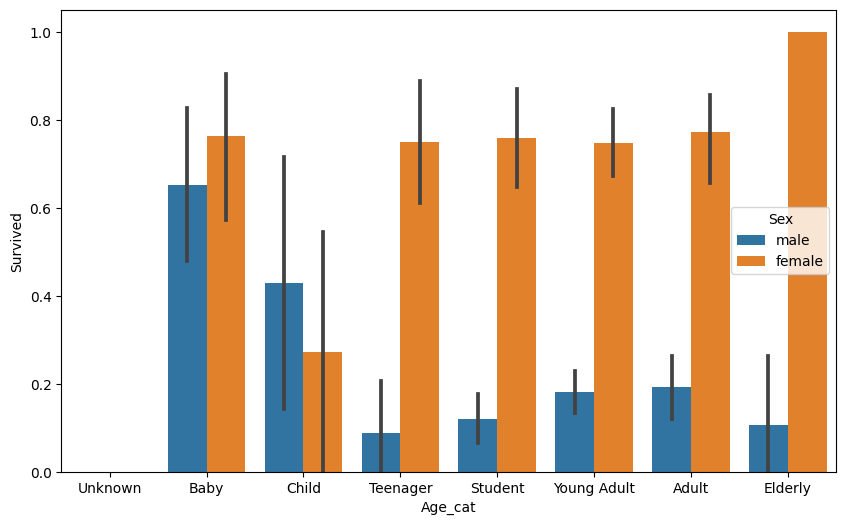

In [9]:
### Age에 따른 생존 확률

# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category 함수를 반환값으로 지정
# get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 알 수 있었다.

이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환한다.

인코딩은 사이킷런의 LabelEncoder 클래스를 이용하여 레이블 인코딩을 적용한다.

여러 칼럼을 encode_features() 함수를 새로 생성하여 한 번에 변환한다.

In [10]:
# 여러 개의 문자열 칼럼을 한 번에 숫자형 칼럼으로 변환 : encode_features()

from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


데이터의 전처리를 전체적으로 호출하는 함수 : transform_features() 만들기

Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성되어있다.


In [11]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 4. transform_features 함수를 이용해 다시 원본 데이터를 가공한다.
1. 원본 csv 파일을 다시 로딩한다. 
2. 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 분리해 클래스 결정값 데이터 세트로 만든다. 
3. Survived 속성을 드랍한 피처 데이터 세트를 만든다. 
4. 이 피처 데이터 세트에 transform_features() 함수를 적용하여 데이터를 가공한다.

In [12]:
### 1, 2, 3. 원본 데이터를 재로딩하고, 피처 데이터 세트(3)와 레이블 데이터(2) 세트 추출.

titanic_df = pd.read_csv('./train.csv')
print(titanic_df.head(3))
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


NameError: name 'LabelEncoder' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

### 5. 타이타닉 생존자 예측하기
ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해보자.


<사이킷런이 제공하는 클래스>

결정트리 : DecisionTreeClassifier

랜덤포레스트 : RandomForestClassifier

로지스틱 회귀 : LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()




# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))




DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 교차검증으로 통한 결정 트리 모델 평가하기
<사이킷런 model_selection 패키지>

1. KFold 클래스

2. cross_val_score()함수

3. GridSearchCV 클래스

##### 1. KFold 클래스로 교차검증

In [ ]:
### 사이킷런의 KFold 클래스를 이용한 교차검증. 폴드 5개

from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_counts, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차 검증 {0}차 정확도 : {1:.4f}'.format(iter_counts, accuracy))

    #5개 fold 에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf, folds=5)
    


교차 검증 0차 정확도 : 0.7542
교차 검증 1차 정확도 : 0.7809
교차 검증 2차 정확도 : 0.7865
교차 검증 3차 정확도 : 0.7697
교차 검증 4차 정확도 : 0.8202
평균 정확도 : 0.7823


#### 2. cross_val_score() API로 교차검증
k폴드와 cross_val_score의 평균 정확도가 다른데, 이는 cross_val_score가 straitified를 이용해 폴드 세트를 분할하기 때문이다.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0}차 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0차 정확도 : 0.7430
교차 검증 1차 정확도 : 0.7753
교차 검증 2차 정확도 : 0.7921
교차 검증 3차 정확도 : 0.7865
교차 검증 4차 정확도 : 0.8427
평균 정확도 : 0.7879


#### 3. GridSearchCV로 DecisionTreeClassifier의 최적 파라미터를 찾고 예측 성능 측정하기
CV는 5개의 폴드 세트를 지정

하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf 3가지를 변경하면서 성능을 측정

최적 하이퍼 파라미터와 그때의 예측을 출력

최적 하이퍼 파라미터로 학습된 Estimator로 예측 수행

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
